In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [9]:
! pip install numba>=0.51.2

  You can safely remove it manually.
  You can safely remove it manually.


In [10]:
!pip install imblearn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.1 MB 18.1 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 19.4 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 18.8 MB/s eta 0:00:00

   ------ --------------------------------- 1/6 [joblib]
   ------------- -------------------------- 2/6 [scikit-learn]
   ------------- -------------------------- 2/6 [scikit-learn]
   ------------- -------------------------- 2/6 [scikit-learn]
   ------------- -------------------------- 2/6 [scikit-learn]
   ------------- -------------------------- 2/6 [scikit-learn]
   ------------- -------------------------- 2/6 [scikit-learn]
   ------------- -------------------------- 2/6 [scikit-learn]
   ------------- -------------------------- 2/6 [scikit-learn]
   ------------- -------------------------- 2/6 [scikit-learn]
   ------------- -------------------------- 2/6 [scikit-learn]
   ----

In [11]:
train = pd.read_csv('./data/AID362red_train.csv')
train.head()

,NEG_01_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,NEG_06_POS,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
0,0,0,0,0,0,0,0,0,0,0,...,3.7730,2.704,119.85,4,6,0,424.569,0,0,Active
1,0,0,0,0,0,0,0,0,0,0,...,3.5674,2.605,94.17,11,8,1,484.593,0,1,Active
2,0,0,0,0,0,0,0,0,0,0,...,3.9847,2.780,77.76,7,5,1,333.384,0,0,Active
3,0,0,0,0,0,0,0,0,0,0,...,3.6643,5.239,119.36,9,8,2,562.659,0,1,Active
4,0,0,0,0,0,0,0,0,0,0,...,3.6613,4.024,76.07,6,6,1,409.482,0,1,Active


In [12]:
print("Keys of iris_dataset: \n{}".format(train.keys()))

Keys of iris_dataset: 
Index(['NEG_01_NEG', 'NEG_03_NEG', 'NEG_04_NEG', 'NEG_05_NEG', 'NEG_06_NEG',
       'NEG_07_NEG', 'NEG_03_POS', 'NEG_04_POS', 'NEG_05_POS', 'NEG_06_POS',
       ...
       'WBN_LP_H_1.00', 'XLogP', 'PSA', 'NumRot', 'NumHBA', 'NumHBD', 'MW',
       'BBB', 'BadGroup', 'Outcome'],
      dtype='object', length=145)


In [13]:
X = train.drop(['Outcome'], axis =1)
y = train ['Outcome']

In [14]:
train['Outcome'].value_counts()


Outcome
Inactive    3375
Active        48
Name: count, dtype: int64

In [15]:
y.value_counts()

Outcome
Inactive    3375
Active        48
Name: count, dtype: int64

In [16]:
'''Our dataset is imbalanced 70:1 for the majority to the minority class'''

'Our dataset is imbalanced 70:1 for the majority to the minority class'

In [17]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state=42)

<Axes: ylabel='count'>

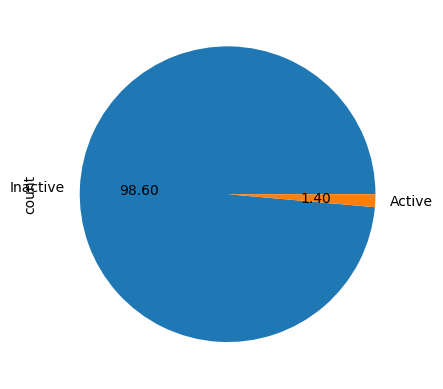

In [18]:
y.value_counts().plot.pie(autopct  = '%.2f')

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier (random_state = 42)
model.fit (X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
from sklearn.metrics import matthews_corrcoef
y_test_pred = model.predict(X_test)
mcc_test = matthews_corrcoef(y_test, y_test_pred)

In [23]:
from sklearn.metrics import matthews_corrcoef
df_labels = pd.Series(['MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

,Performance_metric_names,Performance_metric_values
0,MCC_test,0.299299


In [24]:
'''Under smapling is one way to address this problem where it eliminate some examples from the 
training data set belonging to the majority class.'''
'''In order not to lose important data based on random removal of data points, a more heuritic approach is needed'''
'''Near Miss Undersampling uses such heuristics - selects the data points based on the distance between majority
and minority class examples.'''

'Near Miss Undersampling uses such heuristics - selects the data points based on the distance between majority\nand minority class examples.'

In [25]:
from imblearn.under_sampling import NearMiss

In [26]:
underSampling = NearMiss (version = 1, n_neighbors =3)

In [27]:
from collections import Counter 
X_train_rus, y_train_rus = underSampling.fit_resample(X_train,y_train)

In [28]:
counter = Counter (y_train_rus)
print (counter)

Counter({'Active': 37, 'Inactive': 37})


<Axes: ylabel='count'>

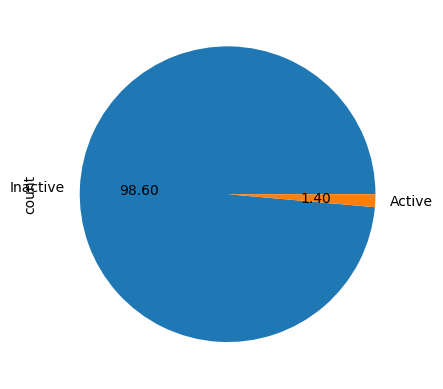

In [30]:
y.value_counts().plot.pie(autopct  = '%.2f')

In [31]:
print(y_train_rus.value_counts())

Outcome
Active      37
Inactive    37
Name: count, dtype: int64


In [32]:
model = RandomForestClassifier (random_state = 42)
model.fit (X_train_rus, y_train_rus)

RandomForestClassifier(random_state=42)

In [33]:
y_test_pred_new = model.predict(X_test)
mcc_test = matthews_corrcoef(y_test, y_test_pred_new)

In [34]:
from imblearn.under_sampling import RandomUnderSampler

In [35]:
from sklearn.metrics import matthews_corrcoef
df_labels = pd.Series(['MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

,Performance_metric_names,Performance_metric_values
0,MCC_test,0.067356


In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
ros = RandomOverSampler(sampling_strategy=1)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

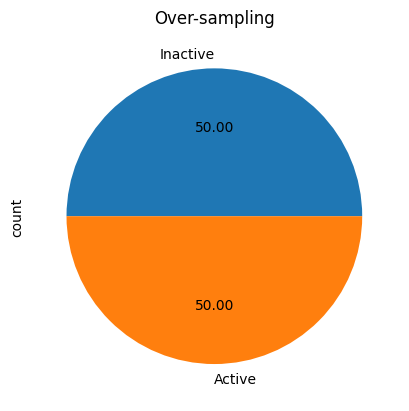

In [38]:
ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [39]:
print(y_train_ros.value_counts())

Outcome
Inactive    2701
Active      2701
Name: count, dtype: int64


In [40]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_ros, y_train_ros)

RandomForestClassifier(random_state=42)

In [41]:
model.fit(X_train_ros, y_train_ros)

RandomForestClassifier(random_state=42)

In [42]:
y_test_pred2 = model.predict(X_test)
mcc_test = matthews_corrcoef(y_test, y_test_pred2)

In [43]:
df_labels = pd.Series(['MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_test], name = 'Performance_metric_values')
df2 = pd.concat([df_labels, df_values], axis=1)
print(df2)

  Performance_metric_names  Performance_metric_values
0                 MCC_test                   0.295062


In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
oversample = SMOTE()
X_SMOTE, y_SMOTE = oversample.fit_resample(X_train, y_train)


In [46]:
print(y_SMOTE.value_counts())

Outcome
Inactive    2701
Active      2701
Name: count, dtype: int64


In [47]:
model = RandomForestClassifier(random_state=42)
model.fit(X_SMOTE, y_SMOTE)
y_test_pred3 = model.predict(X_test)
mcc_test = matthews_corrcoef(y_test, y_test_pred3)

In [48]:
df_labels = pd.Series(['MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_test], name = 'Performance_metric_values')
df2 = pd.concat([df_labels, df_values], axis=1)
print(df2)

  Performance_metric_names  Performance_metric_values
0                 MCC_test                   0.361908
